In [1]:
!pip install polars

In [2]:
!pip install seaborn scikit-learn

In [5]:
import polars as pl

# Cargar el archivo
df = pl.read_csv("players_21.csv")

# Seleccionar columnas de interés
columns = [
    "short_name", "age", "height_cm", "weight_kg", "overall",
    "potential", "value_eur", "wage_eur", "international_reputation",
    "skill_moves", "player_positions", "shooting", "passing", "dribbling"
]
df = df.select(columns)

In [6]:
# Filtrar por jugadores cuya posición principal sea ofensiva
df = df.filter(pl.col("player_positions").str.contains("ST|CF|LW|RW|CAM"))

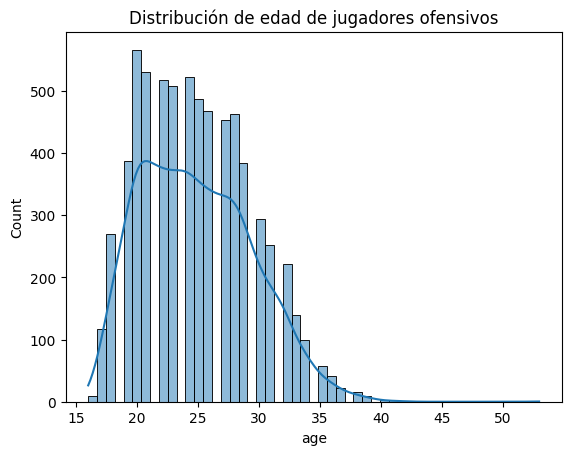

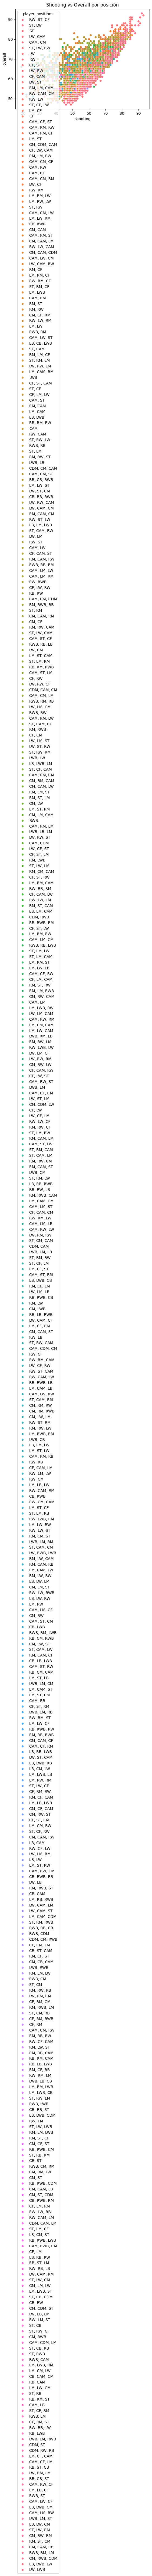

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

df_pd = df.drop_nulls().to_pandas()

# Histograma de edad
sns.histplot(df_pd["age"], kde=True)
plt.title("Distribución de edad de jugadores ofensivos")
plt.show()

# Dispersión de shooting vs overall
sns.scatterplot(data=df_pd, x="shooting", y="overall", hue="player_positions")
plt.title("Shooting vs Overall por posición")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Etiqueta: ¿tiene buenas probabilidades de marcar más de 10 goles?
df = df.drop_nulls()
df = df.with_columns(
    ((pl.col("shooting") > 70) & (pl.col("overall") > 75)).cast(pl.Int8).alias("will_score_10+")
)

# Variables y target
X = df.select(["age", "shooting", "passing", "dribbling", "potential"]).to_pandas()
y = df["will_score_10+"].to_pandas()

# Entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1909
           1       0.95      0.96      0.95       144

    accuracy                           0.99      2053
   macro avg       0.97      0.98      0.97      2053
weighted avg       0.99      0.99      0.99      2053

